In [42]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [43]:
df1 = pd.read_csv('school_data_jun_by_pref2.csv')
df1.head()

,prefecture,futoko_rate_jun,ijime_per_thou_jun,rate_OII_jun,classes_jun
0,Hokkaido,0.72,2.96,0.00,3150
1,Hokkaido,0.80,2.96,0.00,3150
2,Hokkaido,0.84,2.96,0.01,3150
3,Hokkaido,0.87,2.96,0.00,3150
4,Hokkaido,0.96,2.96,0.01,3150


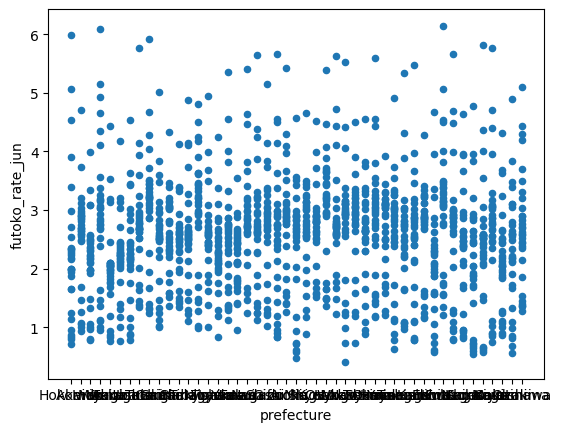

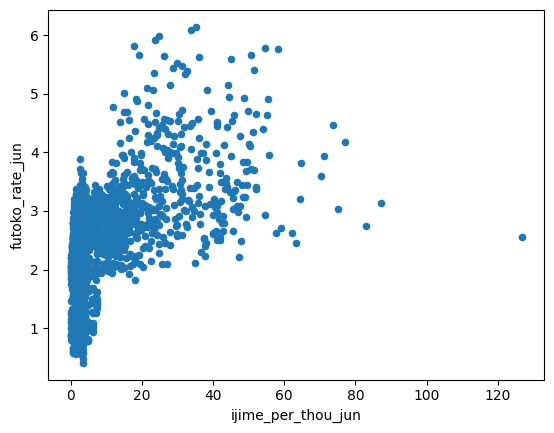

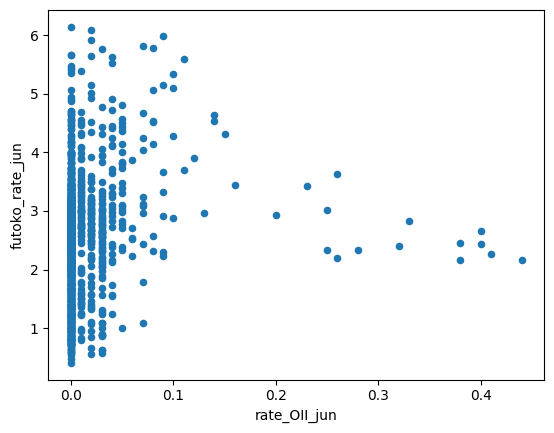

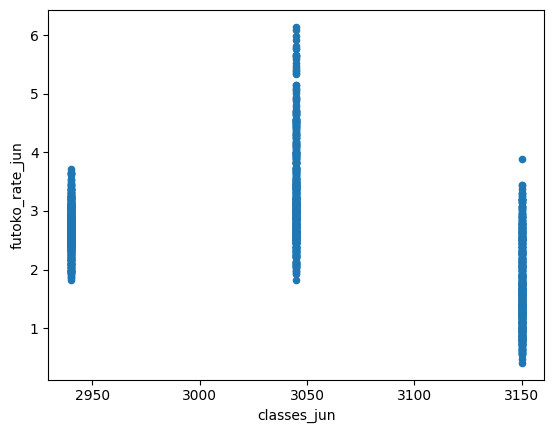

In [44]:
for i in df1.columns:
    if i == 'futoko_rate_jun':
        continue
    df1.plot(kind = 'scatter', x = i, y = 'futoko_rate_jun')

In [46]:
#外れ値の削除
outline = df1[(df1['ijime_per_thou_jun']>120)].index
df2 = df1.drop(outline, axis = 0)
outline

Int64Index([1416], dtype='int64')

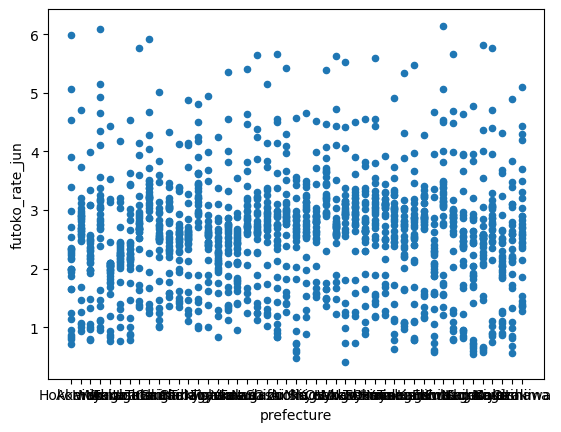

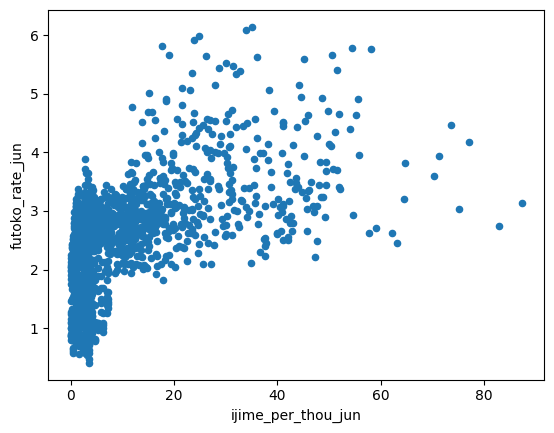

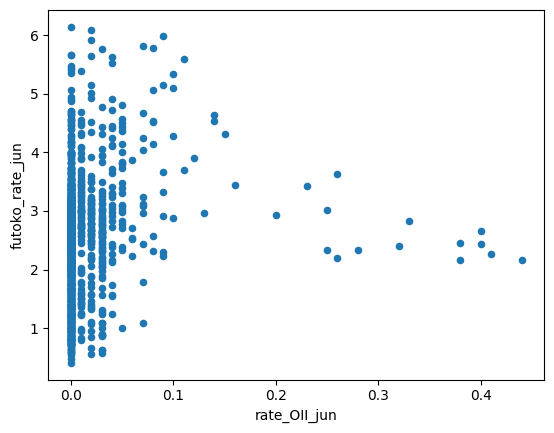

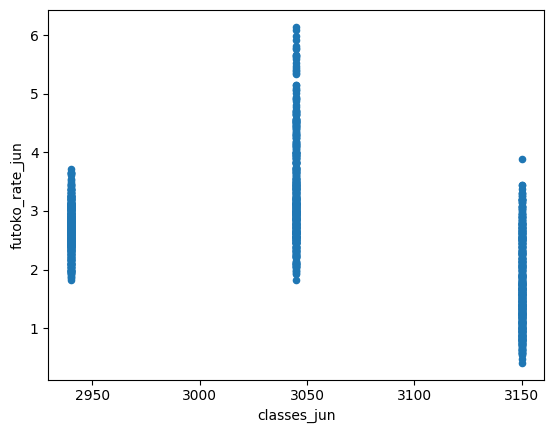

In [47]:
for i in df2.columns:
    if i == 'futoko_rate_jun':
        continue
    df2.plot(kind = 'scatter', x = i, y = 'futoko_rate_jun')

In [48]:
#標準化する
df3 = df2.drop(['prefecture'], axis = 1)
sc = StandardScaler()
sc.fit(df3)
sc_df3 = sc.transform(df3)
sc_df4 = pd.DataFrame(sc_df3, columns = df3.columns)
sc_df4.head()

,futoko_rate_jun,ijime_per_thou_jun,rate_OII_jun,classes_jun
0,-1.967862,-0.631532,-0.287969,1.176267
1,-1.882957,-0.631532,-0.287969,1.176267
2,-1.840504,-0.631532,-0.019370,1.176267
3,-1.808665,-0.631532,-0.287969,1.176267
4,-1.713146,-0.631532,-0.019370,1.176267


In [49]:
#多項式特徴量、交互作用特徴量を出してみる
df4 = sc_df4.loc[:, 'ijime_per_thou_jun':]
poly = PolynomialFeatures(degree = 2)
df5 = poly.fit_transform(df4)
poly.get_feature_names_out()

array(['1', 'ijime_per_thou_jun', 'rate_OII_jun', 'classes_jun',
       'ijime_per_thou_jun^2', 'ijime_per_thou_jun rate_OII_jun',
       'ijime_per_thou_jun classes_jun', 'rate_OII_jun^2',
       'rate_OII_jun classes_jun', 'classes_jun^2'], dtype=object)

In [50]:
#先ほど出した多項式特徴量、交互作用特徴量をデータフレームにする
df6 = pd.DataFrame(df5, columns = ['1', 'ijime_per_thou_jun', 'rate_OII_jun', 'classes_jun',
       'ijime_per_thou_jun^2', 'ijime_per_thou_jun rate_OII_jun',
       'ijime_per_thou_jun classes_jun', 'rate_OII_jun^2',
       'rate_OII_jun classes_jun', 'classes_jun^2'])
df6.head()

,1,ijime_per_thou_jun,rate_OII_jun,classes_jun,ijime_per_thou_jun^2,ijime_per_thou_jun rate_OII_jun,ijime_per_thou_jun classes_jun,rate_OII_jun^2,rate_OII_jun classes_jun,classes_jun^2
0,1.0,-0.631532,-0.287969,1.176267,0.398833,0.181862,-0.74285,0.082926,-0.338729,1.383603
1,1.0,-0.631532,-0.287969,1.176267,0.398833,0.181862,-0.74285,0.082926,-0.338729,1.383603
2,1.0,-0.631532,-0.019370,1.176267,0.398833,0.012233,-0.74285,0.000375,-0.022784,1.383603
3,1.0,-0.631532,-0.287969,1.176267,0.398833,0.181862,-0.74285,0.082926,-0.338729,1.383603
4,1.0,-0.631532,-0.019370,1.176267,0.398833,0.012233,-0.74285,0.000375,-0.022784,1.383603


In [51]:
#’futoko_rate_jun’を戻して'1'を削除
df6['futoko_rate_jun'] = sc_df4['futoko_rate_jun']
df7 = df6.drop(['1'], axis = 1)
df7.head()

,ijime_per_thou_jun,rate_OII_jun,classes_jun,ijime_per_thou_jun^2,ijime_per_thou_jun rate_OII_jun,ijime_per_thou_jun classes_jun,rate_OII_jun^2,rate_OII_jun classes_jun,classes_jun^2,futoko_rate_jun
0,-0.631532,-0.287969,1.176267,0.398833,0.181862,-0.74285,0.082926,-0.338729,1.383603,-1.967862
1,-0.631532,-0.287969,1.176267,0.398833,0.181862,-0.74285,0.082926,-0.338729,1.383603,-1.882957
2,-0.631532,-0.019370,1.176267,0.398833,0.012233,-0.74285,0.000375,-0.022784,1.383603,-1.840504
3,-0.631532,-0.287969,1.176267,0.398833,0.181862,-0.74285,0.082926,-0.338729,1.383603,-1.808665
4,-0.631532,-0.019370,1.176267,0.398833,0.012233,-0.74285,0.000375,-0.022784,1.383603,-1.713146


In [52]:
#相関係数を出してみる
abs(df7.corr()['futoko_rate_jun']).sort_values(ascending=False)

futoko_rate_jun                    1.000000
ijime_per_thou_jun                 0.576352
classes_jun^2                      0.493415
classes_jun                        0.432796
ijime_per_thou_jun classes_jun     0.374945
ijime_per_thou_jun^2               0.291182
ijime_per_thou_jun rate_OII_jun    0.136327
rate_OII_jun                       0.129343
rate_OII_jun classes_jun           0.104264
rate_OII_jun^2                     0.019511
Name: futoko_rate_jun, dtype: float64